<a href="https://colab.research.google.com/github/jnsbrdbr/NLP/blob/master/Spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/emails.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
data.rename(columns={"spam": "lable"})

,text,lable
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


Preprocessing:missing-values and white-space

In [ ]:

# Drop the rows with missing values
data=data.dropna()# drops rows nulls

blanks=[]
for i,text,lable in data.itertuples():
  if text.isspace():
    blanks.append(i)
print(len(blanks),"   |    ", 'blanks: ', blanks , )
data.drop(blanks,inplace=True)





0    |     blanks:  []


**Cleaning with NLTK**

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Define a function to preprocess text
def preprocess_text(messy_string):
  assert(type(messy_string)==str)
  cleaned= ' '.join([lemmatizer.lemmatize(word) for word in messy_string.split() if word not in sw])
  return cleaned

In [ ]:
data['text']=data['text'].apply(preprocess_text)

**PROCESSING**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
text_processing_pipline= Pipeline([
    ('Vectorize', CountVectorizer()),
    ('TF-IDF', TfidfTransformer())
])

In [ ]:
text_processing_pipline

Pipeline(steps=[('Vectorize', CountVectorizer()),
                ('TF-IDF', TfidfTransformer())])

In [ ]:
data

,text,spam
0,Subject: naturally irresistible corporate iden...,1
1,Subject: stock trading gunslinger fanny merril...,1
2,Subject: unbelievable new home made easy im wa...,1
3,Subject: 4 color printing special request addi...,1
4,"Subject: money , get software cd ! software co...",1
...,...,...
5723,Subject: : research development charge gpg ! -...,0
5724,"Subject: : receipt visit jim , thanks invitati...",0
5725,Subject: : enron case study update wow ! day ....,0
5726,"Subject: : interest david , please , call shir...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["spam"], test_size=0.3, random_state=42)

In [ ]:
X_train = text_processing_pipline.fit_transform(X_train)
X_test = text_processing_pipline.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix

Classification report for SVC: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1278
           1       0.99      0.98      0.99       441

    accuracy                           0.99      1719
   macro avg       0.99      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



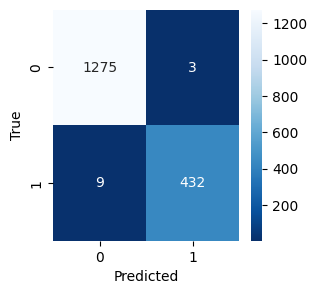

--------------------------------------------
Classification report for RandomForest: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1278
           1       1.00      0.89      0.94       441

    accuracy                           0.97      1719
   macro avg       0.98      0.94      0.96      1719
weighted avg       0.97      0.97      0.97      1719



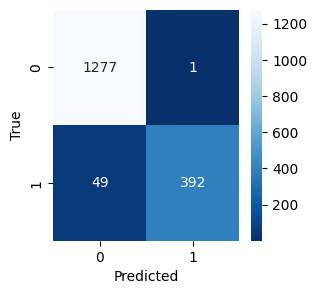

--------------------------------------------
Classification report for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1278
           1       0.99      0.90      0.94       441

    accuracy                           0.97      1719
   macro avg       0.98      0.95      0.96      1719
weighted avg       0.97      0.97      0.97      1719



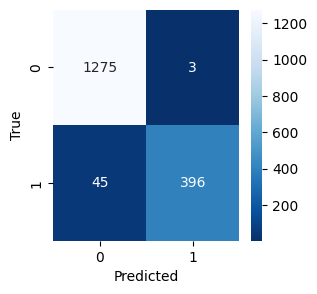

--------------------------------------------
Classification report for MultinomialNB: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1278
           1       1.00      0.50      0.67       441

    accuracy                           0.87      1719
   macro avg       0.93      0.75      0.79      1719
weighted avg       0.89      0.87      0.86      1719



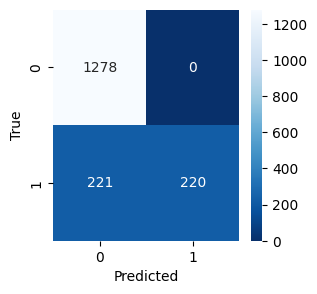

--------------------------------------------


In [ ]:
classifiers = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "MultinomialNB": MultinomialNB()
}
for classifier_name, classifier_obj in classifiers.items():
    # Fit the model
    classifier_obj.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier_obj.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print(f'Classification report for {classifier_name}: ')
    print(report)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix using matplotlib and seaborn
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'Blues_r')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("--------------------------------------------")

In [ ]:
data.iloc[670]

text    Subject: fast ship viagra , phentermine , etc ...
spam                                                    1
Name: 670, dtype: object

In [ ]:
custom_email = data.iloc[760]['text']


custom_email = text_processing_pipline.transform([preprocess_text(custom_email)])

print(classifiers["SVC"].predict(custom_email))

[1]
